In [1]:
import pandas as pd
from malnis import show
from nltk.tokenize import sent_tokenize
from tqdm.notebook import tqdm
import os

In [2]:
# data = pd.read_pickle("results_bkp.pkl").sort_values("r2", ascending = False)
# show(data)

In [3]:
folder = "../scripts/summaries/temp"
files = os.listdir(folder)
files

pkl = sorted([f for f in files if f[:8] == "results_" and f[8:11] != "bkp"])
pkl

data = pd.concat(
    [pd.read_pickle(folder + "/" + p) for p in pkl]
)
show(data)

(8965, 6)


,query,document,summary,r1,r2,rl
0,We introduce a new language representation mod...,"KEYWORDS cascade ranking, pre-trained language...",[Our approach is mainly based on the BERT lang...,0.237885,0.065359,0.229075
1,The dominant sequence transduction models are ...,"KEYWORDS cascade ranking, pre-trained language...",[BERT [2] is a self-supervised approach for pr...,0.238372,0.063366,0.215116
2,Language model pretraining has led to signific...,"KEYWORDS cascade ranking, pre-trained language...","[Recently, some variants [4, 12] of BERT langu...",0.172727,0.047782,0.172727
3,With the capability of modeling bidirectional ...,"KEYWORDS cascade ranking, pre-trained language...","[Recently, some variants [4, 12] of BERT langu...",0.237838,0.078740,0.227027
4,Neural sequence-to-sequence models have provid...,"KEYWORDS cascade ranking, pre-trained language...",[The proposed model is based on the pointer-ge...,0.215139,0.093023,0.199203


<AxesSubplot:ylabel='Frequency'>

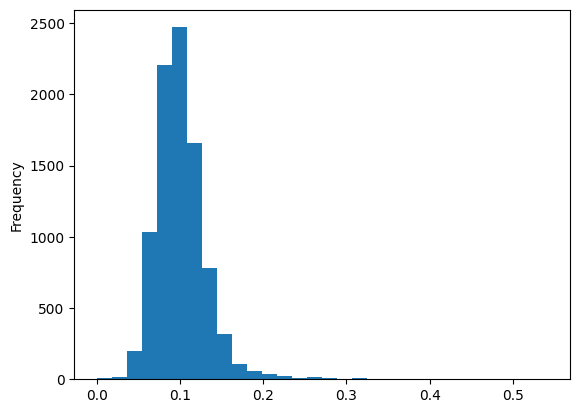

In [4]:
data.r2.plot.hist(bins = 30)

In [5]:
(data.r2 > 0.2).sum()

118

In [6]:
relevance = data\
.assign(sentences = [sent_tokenize(x) for x in tqdm(data.document)])\
.assign(
    relevance = lambda df: df.apply(
        lambda r: [True if s in r["summary"] else False for s in r["sentences"]], 
        axis = "columns"
    )
)
show(relevance)

  0%|          | 0/8965 [00:00<?, ?it/s]

(8965, 8)


,query,document,summary,r1,r2,rl,sentences,relevance
0,We introduce a new language representation mod...,"KEYWORDS cascade ranking, pre-trained language...",[Our approach is mainly based on the BERT lang...,0.237885,0.065359,0.229075,"[KEYWORDS cascade ranking, pre-trained languag...","[False, False, False, False, False, False, Fal..."
1,The dominant sequence transduction models are ...,"KEYWORDS cascade ranking, pre-trained language...",[BERT [2] is a self-supervised approach for pr...,0.238372,0.063366,0.215116,"[KEYWORDS cascade ranking, pre-trained languag...","[False, False, False, False, False, True, Fals..."
2,Language model pretraining has led to signific...,"KEYWORDS cascade ranking, pre-trained language...","[Recently, some variants [4, 12] of BERT langu...",0.172727,0.047782,0.172727,"[KEYWORDS cascade ranking, pre-trained languag...","[False, False, False, False, False, True, Fals..."
3,With the capability of modeling bidirectional ...,"KEYWORDS cascade ranking, pre-trained language...","[Recently, some variants [4, 12] of BERT langu...",0.237838,0.078740,0.227027,"[KEYWORDS cascade ranking, pre-trained languag...","[False, False, False, False, False, False, Tru..."
4,Neural sequence-to-sequence models have provid...,"KEYWORDS cascade ranking, pre-trained language...",[The proposed model is based on the pointer-ge...,0.215139,0.093023,0.199203,"[KEYWORDS cascade ranking, pre-trained languag...","[False, False, False, False, False, False, Fal..."


In [7]:
all(relevance.sentences.map(len) == relevance.relevance.map(len))

True

In [8]:
relevance.to_pickle("../data/sentence_labels.pkl")